数据准备

In [108]:
import pandas as pd  # 导入 pandas 库并使用别名 pd

In [109]:
pip install jieba # 安装 jieba 库

12596.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


数据读取

In [110]:

# Read the Excel file
text_ana = pd.read_excel('text_analysis_weibo_sample.xlsx',index_col=0)
# text _ana = text_ana.drop(['unamed:0'], axis=1)

3


3

分析语料

In [111]:
# 分析语料 - 提取文本内容为列表
# 功能：从text_ana中提取'标题/微博内容'列并转换为列表
# 变量：text 存储转换后的文本列表
# 注意：可在此处对text进一步处理，如遍历、分词等
text =list(text_ana['标题/微博内容'])
#text[0]  # 显示第一个文本内容

In [112]:
# 分析语料 - 查看部分文本数据
# 功能：从text_ana中查看'标题/微博内容'列的前10条数据
# 说明：先选取'标题/微博内容'列，再用head方法获取前10条
# 注意：也可使用其他pandas方法进行更多探索性分析
text_ana [['标题/微博内容']]
text_ana['标题/微博内容'].head(10)  # 显示前10条微博内容

0      国债：地产行业重磅利好提振风险偏好，期债低开低走     国债期货全线收跌，10年期主力...
1                                        #喜迎二十大 忠诚保平安#
2    注意！事关明日教资考试！福建省教育考试院发布补充公告  福建省2022年下半年全国中小学教师...
3                       近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...
4                                               樊振东牛逼！
5                              //@德州同城会:虽不能至 心向往之[左哼哼]
6    严惩弄虚作假，玩弄全国网民的罪犯们//@克克丨:你们真厉害，两个词条 http://t.cn...
7                                                   关注
8    笑死我了我怎么才看到这条啊哈哈哈哈哈哈哈哈哈哈哈[doge][doge][doge]//@许...
9       截至目前，除南京、东莞外，已有22个GDP“万亿俱乐部”城市晒出上半年成绩单，排位变化...
Name: 标题/微博内容, dtype: object

分词

In [113]:
# 导入 jieba 库用于中文分词处理
import jieba

def word_segmentation(text):  
    """
    将输入的中文文本进行分词处理
    参数:
        text: 待分词的字符串
    返回:
        分词后用空格连接的字符串
    """
    # 使用 jieba 的精确模式进行分词，返回分词列表
    words = jieba.lcut(text)
    # 将分词列表用空格连接成字符串（原代码此处用''连接会导致词无分隔，可能是笔误）
    return ' '.join(words)  # 修正: 使用空格连接分词结果

# 数据预处理步骤：
# 1. 选取 text_ana 数据框的'标题/微博内容'列
# 2. 仅处理前100条数据（通过 .iloc[:100] 实现）
# 3. 确保数据类型为字符串（通过 .astype(str) 实现）
# 4. 对每条文本应用分词函数（通过 .apply(word_segmentation) 实现）
# 5. 将处理结果覆盖回原数据框的'标题/微博内容'列
text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100]\
    .astype(str).apply(word_segmentation)

# 查看处理后的前5条数据，验证分词效果
print(text_ana['标题/微博内容'].head(5))

0        国债 ： 地产 行业 重磅 利好 提振 风险 偏好 ， 期债 低开 低 走     ...
1                                  # 喜迎 二十大   忠诚 保平安 #
2    注意 ！ 事关 明日 教资 考试 ！ 福建省 教育 考试院 发布 补充 公告     福建省...
3                                          近日 ， “ 千...
4                                            樊振东 牛 逼 ！
Name: 标题/微博内容, dtype: object


In [114]:
text = list(text_ana['标题/微博内容'].dropna())  # 将'标题/微博内容'列转换为列表，并去除空值
#text[0]  # 显示第一个文本内容

构建词袋模型

In [115]:
from sklearn.feature_extraction.text import CountVectorizer   # 导入 CountVectorizer 用于文本特征提取

#初始化
vectorizer = CountVectorizer()

# 将文本数据转化为词袋特征矩阵
X = vectorizer.fit_transform(text_ana['标题/微博内容'].dropna())

#展示特征矩阵的形状
print('词袋特征矩阵的形状：', X.shape)


词袋特征矩阵的形状： (100, 5815)


In [116]:

#展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())


特征词列表: ['00' '000713' '000998' ... '龙头' '龙头企业' '龙湖']


In [117]:
len(vectorizer.get_feature_names_out())   # 输出特征词的数量

5815

In [118]:
X    # 输出词袋特征矩阵的内容
# 显示前5行数据
X_df.head(5)  # 显示前5行的词袋特征矩阵
# 将词袋特征矩阵转换为 DataFrame 以便于查看
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [119]:
feature_words = vectorizer.get_feature_names_out()    # # 获取特征词列表
# 将特征词列表转换为 DataFrame
feature_words_df = pd.DataFrame(feature_words, columns=['特征词'])

In [120]:
feature_words.shape   # 输出特征词的数量

(5815,)

In [121]:
X.sum(axis=0).shape  # 输出每个特征词的总出现次数

(1, 5815)

In [122]:
X.sum(axis=0)[0]   # 输出第一个特征词的总出现次数

matrix([[6, 1, 1, ..., 2, 1, 2]], shape=(1, 5815))

In [123]:
#计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [124]:
word_freq  # 输出词频统计结果，字典形式，键为特征词，值为对应的出现次数
#  显示前10个词频
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
top_10_words = sorted_word_freq[:10]

In [125]:
word_freq.items()   # 输出词频统计结果的所有项，键为特征词，值为对应的出现次数
# 显示前10个词频
print("前10个词频：", top_10_words)

前10个词频： [('万吨', np.int64(170)), ('市场', np.int64(168)), ('库存', np.int64(103)), ('中国', np.int64(93)), ('预期', np.int64(92)), ('需求', np.int64(88)), ('下降', np.int64(82)), ('电子', np.int64(82)), ('加息', np.int64(75)), ('同比', np.int64(75))]


词频统计

In [126]:
#观察词袋模型的词频统计结果   
sorted(word_freq.items(), key=lambda  x: x[1], reverse=True)
# 将词频统计结果转换为 DataFrame
word_freq_df = pd.DataFrame(sorted_word_freq, columns=['词语', '词频'])
# 显示前10个词频的 DataFrame
word_freq_df.head(10)

,词语,词频
0,万吨,170
1,市场,168
2,库存,103
3,中国,93
4,预期,92
5,需求,88
6,下降,82
7,电子,82
8,加息,75
9,同比,75


词云图

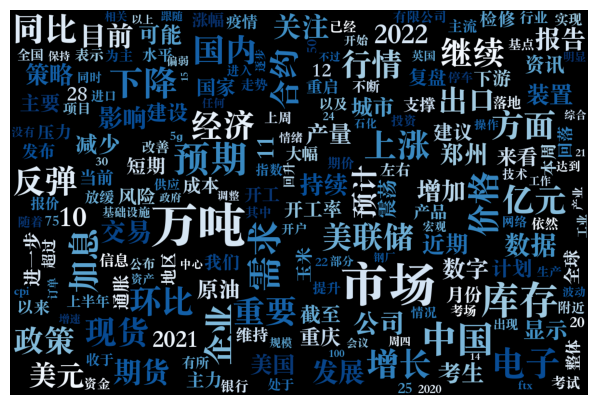

In [127]:
from wordcloud import WordCloud   # # 导入 WordCloud 用于生成词云图
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot 用于绘图
# 指定中文字体路径（根据系统修改）
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'  # macOS系统
# font_path = '/System/Library/Fonts/字体名字.ttc'  # macOS系统
#根据词袋模型分析结果绘制词云图
wc = WordCloud(
       font_path=font_path,  # 指定字体
width=1200, height=800,
max_words=200,#设置最大显示的词数
colormap='Blues',
#random_state=100, #设置随机种子，保证每次生成的词云图相同
#min_font_size=10， #设置最小字体大小
max_font_size=100, #设置字体最大值
mode='RGBA',#设置背景颜色为透明
).generate_from_frequencies(word_freq)
#显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')
# plt.savefig('wordcloud_twi.png', dpi=100)
plt.show()